In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from env import host, username, password
from pydataset import data
import os
from env import get_db_url
from acquire import get_titanic_data, get_iris_data
from prepare import prep_iris
import scipy

In [2]:
##In a jupyter notebook, classification_exercises.ipynb, 
##use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. 
##Create a pandas dataframe, df_iris, from this data.



In [3]:
df_iris = data('iris')

In [4]:
#1a.) print the first 3 rows

df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [5]:
#1b.) print the number of rows and columns (shape)

df_iris.shape


(150, 5)

In [6]:
#1c.) print the column names

list(df_iris)

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [7]:
df_iris.columns.to_list()

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [8]:
#1d.) print the data type of each column
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [9]:
#1e.) print the summary statistics for each of the numeric variables. 
 #Would you recommend rescaling the data based on these statistics?
    
stats = df_iris.describe().T
stats    
    
    

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [10]:
##Not seeing a need to rescale2.) Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

df_excel = pd.read_csv('Spreadsheets_Exercises.csv')
df_excel_sample = df_excel.head(100)

numeric = df_excel_sample.select_dtypes(include = ['int64', 'float64'])
temp = numeric.describe()
temp.to_markdown





<bound method DataFrame.to_markdown of        is_senior_citizen  phone_service  internet_service  contract_type  \
count         100.000000     100.000000        100.000000     100.000000   
mean            0.190000       1.330000          1.300000       0.660000   
std             0.394277       0.667499          0.771984       0.819214   
min             0.000000       0.000000          0.000000       0.000000   
25%             0.000000       1.000000          1.000000       0.000000   
50%             0.000000       1.000000          1.000000       0.000000   
75%             0.000000       2.000000          2.000000       1.000000   
max             1.000000       2.000000          2.000000       2.000000   

       monthly_charges  total_charges  
count       100.000000     100.000000  
mean         68.967000    2481.929500  
std          31.230825    2434.628234  
min          19.400000      19.850000  
25%          44.825000     525.162500  
50%          75.300000    1559.17500

In [11]:
#2c.) print the first 5 column names
print(list(df_excel)[0:5])

['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents']


In [12]:
#2d.) print the column names that have a data type of object
print(df_excel.columns[df_excel.dtypes==object])

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')


In [13]:
#2e.) compute the range for each of the numeric variables.

In [14]:
stats_ex = df_excel.describe().T
stats_ex['range'] = stats_ex['max'] - stats_ex['min']
stats_ex

,count,mean,std,min,25%,50%,75%,max,range
is_senior_citizen,7049.0,0.162009,0.368485,0.00,0.0000,0.00,0.000,1.00,1.0
phone_service,7049.0,1.324585,0.642709,0.00,1.0000,1.00,2.000,2.00,2.0
internet_service,7049.0,1.222585,0.779068,0.00,1.0000,1.00,2.000,2.00,2.0
contract_type,7049.0,0.690878,0.833757,0.00,0.0000,0.00,1.000,2.00,2.0
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75,100.5
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80,8666.0


In [15]:
df_excel.select_dtypes('number').max() - df_excel.select_dtypes('number').min()

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
dtype: float64

In [16]:
#3.) https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit?usp=sharing
#Turn into df_google

In [17]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(csv_export_url)

In [18]:
#3a.) print the first 3 rows
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [19]:
df_google.shape

(891, 12)

In [20]:
#3c.) print the column names
print(df_google.columns.to_list())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [21]:
#3d.) print the data type of each column
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [22]:
##print the summary statistics for each of the numeric variables

df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [23]:
#3f.) print the unique values for each of your categorical variables

for col in df_google.columns:
    if df_google[col].dtypes == 'object':
        print(f'{col} has {df_google[col].nunique()} unique values.')

Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


In [24]:
df_google.Survived.value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

In [25]:
df_google.Survived.value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

In [26]:
df_google.Sex.value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [27]:
df_obj_only = df_google.select_dtypes(include='object')
for i in df_obj_only.columns:
     print(df_google[i].unique())

['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Nellie"' 'Todoro

In [28]:
titanic_df = get_titanic_data()

In [29]:
iris_df = get_iris_data()

In [30]:
os.path.isfile('titanic_df.csv')

True

In [31]:
titanic_df.to_csv('titanic_df.csv')

In [32]:
iris_df.to_csv('iris_df.csv')

In [33]:
titanic_df.describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_id,891.0,445.000000,257.353842,0.00,222.5000,445.0000,667.5,890.0000
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
alone,891.0,0.602694,0.489615,0.00,0.0000,1.0000,1.0,1.0000


Exercises
The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

Using the Iris Data:

Use the function defined in acquire.py to load the iris data.

Drop the species_id and measurement_id columns.

Rename the species_name column to just species.

Create dummy variables of the species name.

Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [34]:
iris_df = get_iris_data()
iris_df

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2
5,1,setosa,6,5.4,3.9,1.7,0.4
6,1,setosa,7,4.6,3.4,1.4,0.3
7,1,setosa,8,5.0,3.4,1.5,0.2
8,1,setosa,9,4.4,2.9,1.4,0.2
9,1,setosa,10,4.9,3.1,1.5,0.1


In [35]:
#2.) Drop the species_id and measurement_id columns.
df = iris_df.drop(columns = ['species_id', 'measurement_id'])

In [36]:
#3.) Rename the species_name column to just species.
df = df.rename(columns=({'species_name': 'species'}))

In [37]:
#4.) Create dummy variables of the species name.

In [38]:
dummy_df = pd.get_dummies(df[['species']], dummy_na=False, drop_first=[True])

In [39]:
df = pd.concat([df, dummy_df], axis=1)



In [40]:

df = get_iris_data()

In [41]:
from prepare import prep_iris

In [42]:
df = prep_iris(df)

In [43]:
df

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0
5,setosa,5.4,3.9,1.7,0.4,0,0
6,setosa,4.6,3.4,1.4,0.3,0,0
7,setosa,5.0,3.4,1.5,0.2,0,0
8,setosa,4.4,2.9,1.4,0.2,0,0
9,setosa,4.9,3.1,1.5,0.1,0,0


Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

Document takeaways & any actions.

In [44]:
iris_df = get_iris_data()

In [45]:
iris_df = prep_iris(iris_df)

In [46]:
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


In [47]:
from sklearn.model_selection import train_test_split
# imputer from sklearn
from sklearn.impute import SimpleImputer

In [48]:
train, test = train_test_split(df, test_size=0.2, random_state=123, stratify = df.species)
train, validate = train_test_split(train, train_size=0.7, random_state=123, stratify = train.species)

In [49]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
79,versicolor,5.7,2.6,3.5,1.0,1,0
36,setosa,5.5,3.5,1.3,0.2,0,0
133,virginica,6.3,2.8,5.1,1.5,0,1
95,versicolor,5.7,3.0,4.2,1.2,1,0
18,setosa,5.7,3.8,1.7,0.3,0,0


In [50]:
train.shape

(84, 7)

In [51]:
#checking for same number of columns throughout
print(df.shape, train.shape, validate.shape, test.shape)

(150, 7) (84, 7) (36, 7) (30, 7)


In [52]:
cat_vars = ['species']
quant_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

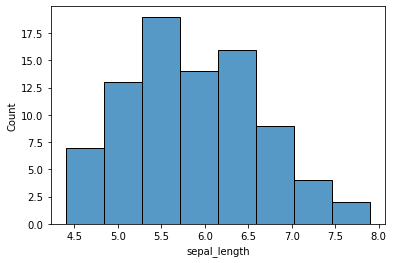

In [53]:
sns.histplot(train.sepal_length)

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

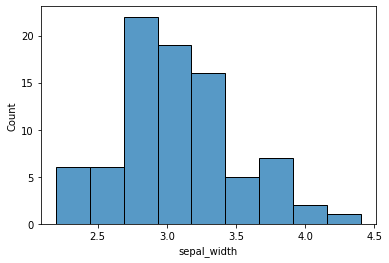

In [54]:

sns.histplot(train.sepal_width)

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

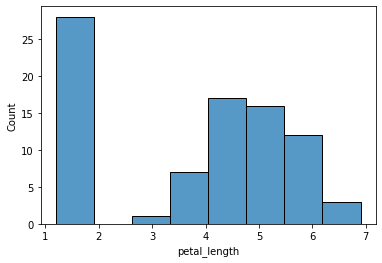

In [55]:
sns.histplot(train.petal_length)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_length'>

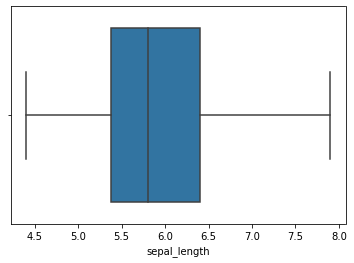

In [56]:
sns.boxplot(train.sepal_length)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_width'>

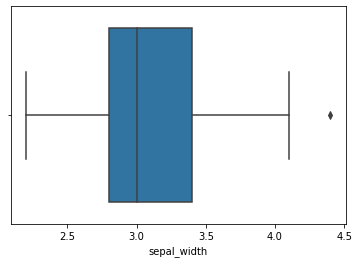

In [57]:
sns.boxplot(train.sepal_width)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petal_length'>

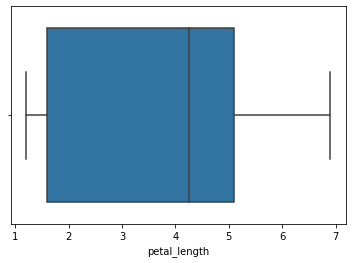

In [58]:
sns.boxplot(train.petal_length)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petal_width'>

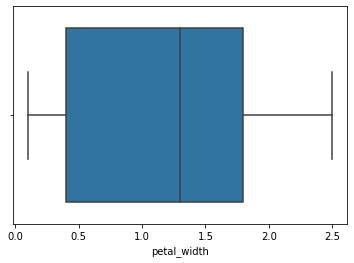

In [59]:
sns.boxplot(train.petal_width)

In [60]:

train.sepal_length.describe()

count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64

In [61]:
train.sepal_width.describe()

count    84.000000
mean      3.075000
std       0.448256
min       2.200000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64

In [62]:
train.petal_length.describe()

count    84.000000
mean      3.771429
std       1.734940
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64

In [63]:
train.petal_width.describe()

count    84.000000
mean      1.203571
std       0.752577
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64

In [64]:
train.value_counts('species')

species
setosa        28
versicolor    28
virginica     28
dtype: int64

<AxesSubplot:xlabel='species'>

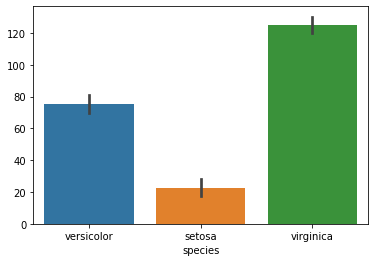

In [65]:
sns.barplot( x =train.species, y = train.index)

In [66]:
train.sepal_length.mean()

5.870238095238095

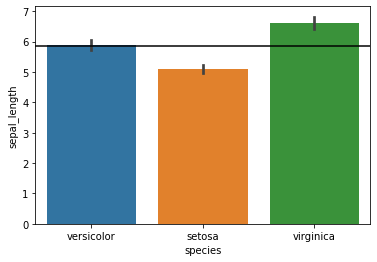

In [67]:
sns.barplot(data = train, y = 'sepal_length', x = 'species')
plt.axhline(y=train.sepal_length.mean(), color='black')
plt.show()

In [68]:
train[train.species=='setosa'].describe().drop(columns=['species_versicolor','species_virginica'])

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.00000
mean,5.089286,3.467857,1.507143,0.27500
std,0.360390,0.427788,0.184448,0.12057
min,4.400000,2.300000,1.200000,0.10000
25%,4.875000,3.275000,1.400000,0.20000
50%,5.000000,3.400000,1.500000,0.20000
75%,5.400000,3.800000,1.600000,0.40000
max,5.800000,4.400000,1.900000,0.60000


In [69]:
train[train.species=='virginica'].describe().drop(columns=['species_versicolor','species_virginica'])

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,6.625000,2.960714,5.535714,2.021429
std,0.532378,0.318956,0.496815,0.293582
min,5.800000,2.200000,4.800000,1.500000
25%,6.300000,2.800000,5.100000,1.800000
50%,6.450000,3.000000,5.500000,2.000000
75%,6.900000,3.100000,5.800000,2.300000
max,7.900000,3.800000,6.900000,2.500000


In [70]:
train[train.species=='versicolor'].describe().drop(columns=['species_versicolor','species_virginica'])

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,5.896429,2.796429,4.271429,1.314286
std,0.425556,0.280848,0.409930,0.199470
min,4.900000,2.300000,3.300000,1.000000
25%,5.600000,2.600000,4.000000,1.200000
50%,5.800000,2.800000,4.250000,1.300000
75%,6.125000,3.000000,4.525000,1.500000
max,6.900000,3.400000,5.100000,1.800000


In [71]:
from scipy import stats

In [72]:
#Mann whitney test for virginica & versicolor across measurement types

In [73]:
u, p = stats.mannwhitneyu(train[train.species=='virginica'].petal_width, train[train.species=='versicolor'].petal_width)
u, p

(17.0, 3.235595834904965e-10)

In [74]:
u, p = stats.mannwhitneyu(train[train.species=='virginica'].petal_length, train[train.species=='versicolor'].petal_length)
u, p

(7.5, 1.4739917857575313e-10)

In [75]:
u, p = stats.mannwhitneyu(train[train.species=='virginica'].sepal_width, train[train.species=='versicolor'].sepal_width)
u, p

(274.0, 0.026286295699228482)

In [76]:
u, p = stats.mannwhitneyu(train[train.species=='virginica'].sepal_length, train[train.species=='versicolor'].sepal_length)
u, p

(107.5, 1.541014598267054e-06)

In [77]:
# Key takeaways:
# Sepal width is the least different out of all the measurement types, so that would not be a good one to use to predict what type it is

4.) Multivariate Stats

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

Document takeaways and any actions.

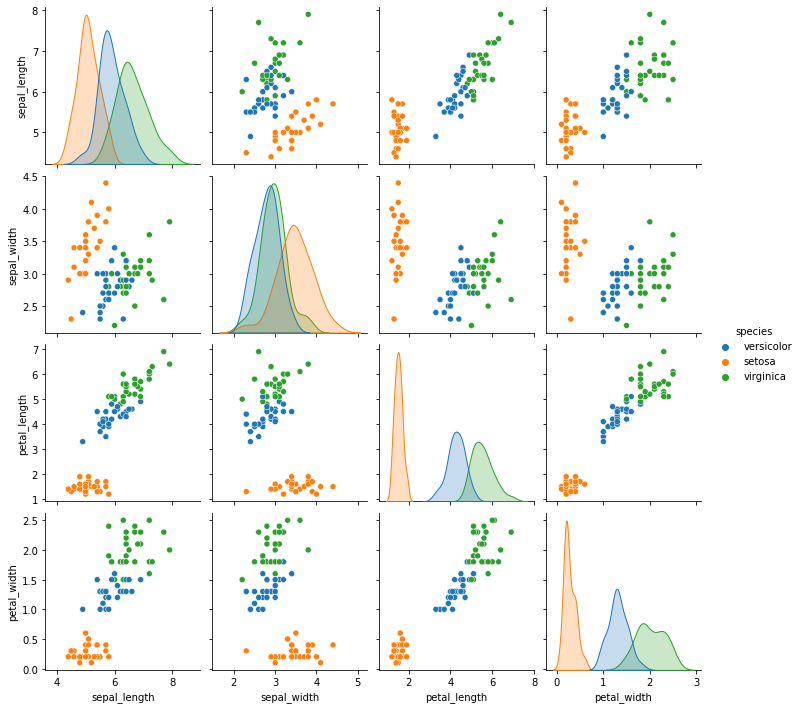

In [78]:
sns.pairplot(data=train.drop(columns=['species_versicolor', 'species_virginica']), hue='species')

In [79]:
dropped_train = train.drop(columns=['species_versicolor', 'species_virginica'])
melted_train = dropped_train.melt(id_vars=['species'])
melted_train

,species,variable,value
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7
...,...,...,...
331,setosa,petal_width,0.2
332,versicolor,petal_width,1.6
333,versicolor,petal_width,1.3
334,setosa,petal_width,0.4


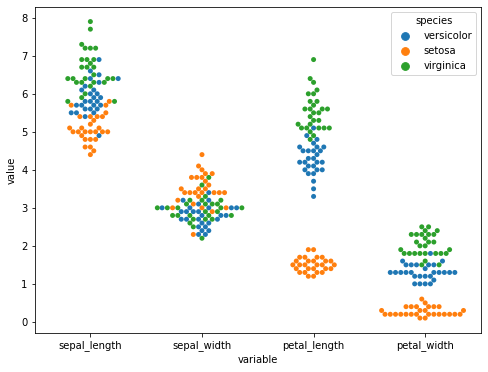

In [80]:
plt.figure(figsize=(8,6))
p = sns.swarmplot(
x='variable',
y='value',
hue='species',
data=melted_train)

# setting to logscale 
#p.set(yscale='log', xlabel='')
plt.show()

In [81]:
# Is the petal area significantly different in versicolor compared to virginica? Mann-whitney test

In [82]:
dropped_train['petal_area'] = dropped_train.petal_length * dropped_train.petal_width

In [83]:
u, p = stats.mannwhitneyu(dropped_train[dropped_train.species=='virginica'].petal_area, dropped_train[dropped_train.species=='versicolor'].petal_area)
u, p

(4.5, 1.1321800903387935e-10)

In [84]:
# There is evidence to suggest that petal area between virginica and versicolor are significantly different

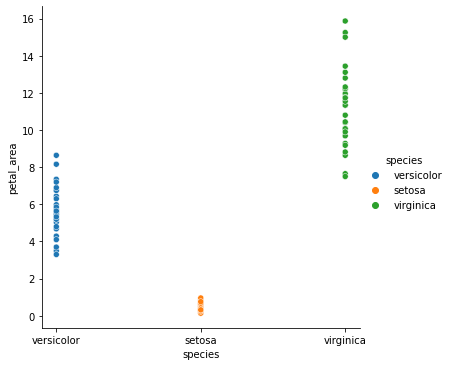

In [85]:

sns.relplot(data=dropped_train, x='species', y='petal_area', hue='species')

In [86]:
# Takeaway:
# It's suggested to include petal area as a variable as well